<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
• Data cleaning:
Menghilangkan nilai-nilai data yang salah, memperbaiki kekacauan data dan memeriksa data yang tidak konsisten.
• Data integration:
Menggabungkan data dari beberapa sumber (database, data cube, atau file) ke dalam penyimpanan data yang sesuai.
• Data transformation:
Normalisasi dan pengumpulan data sehingga menjadi sama.
• Data reduction:
Menguraikan data ke dalam bentuk yang lebih kecil ukurannya tetapi tetap menghasilkan hasil analitis yang sama.
• Data discredization:
Bagian dari data reduksi tetapi memiliki arti penting tersendiri, terutama untuk data numerik.

2. Jelaskan beberapa cara inputing missing value!

a. Menggunakan method Imputer
Method Imputer berfungsi untuk mengganti data yang tidak lengkap. Isi data yang akan dimasukkan oleh method Imputer dapat diatur sesuai jenis strategy-nya, misalkan menggunakan mean dari sebuah column.

b. Menggunakan method FillNA
Method FillNA berfungsi untuk menyisipkan sebuah data spesifik pada sebuah kolom. Misalnya untuk mengisi nilai NaN pada kolom A dengan isian berupa 5.0

3. Kapan kita perlu melakukan feature centering dan scaling?

Scaling dilakukan saat rentang nilai antara data training dan data test adalah tidak sama.

Centering dilakukan saat rerata suatu variabel baru tidak sama dengan 0 (belum terpusat). Centering dilakukan dengan mengurangkan mean variabel dari setiap titik data sehingga mean variabel baru tersebut adalah 0

4. Bagaimana Data Science Workflow?

a. Memahami Proses Bisnis

b. Mengolah Data: Cleaning, Manipulating, Visualizing, Processing, Transforming, and Understanding

c. Mengkomunikasikan (memaparkan) hasil pengolahan data

Jawab:

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [3]:
# Code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('titanic.csv')
test = pd.read_csv('titanic_test.csv')

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train_copy = train.copy()
test_copy = test.copy()

train = train.drop(['PassengerId', 'Ticket'], axis = 1)
test = test.drop(['PassengerId', 'Ticket',], axis = 1)
combine = [train, test]

train['Cabin'].fillna('U', inplace=True)
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])

test['Cabin'].fillna('U', inplace=True)
test['Cabin'] = test['Cabin'].apply(lambda x: x[0])

train = train.drop(['Age', 'Name', 'SibSp', 'Parch' ], axis = 1)
test = test.drop(['Name', 'SibSp', 'Parch'], axis = 1)

train = train.drop(['Fare'], axis=1)
combine = [train, test]

x_train = train.drop('Survived', axis = 1)
y_train = train.Survived

x_test = test

print(combine)


[     Survived  Pclass     Sex Cabin Embarked
0           0       3    male     U        S
1           1       1  female     C        C
2           1       3  female     U        S
3           1       1  female     C        S
4           0       3    male     U        S
..        ...     ...     ...   ...      ...
886         0       2    male     U        S
887         1       1  female     B        S
888         0       3  female     U        S
889         1       1    male     C        C
890         0       3    male     U        Q

[891 rows x 5 columns],      Pclass     Sex   Age      Fare Cabin Embarked
0         3    male  34.5    7.8292     U        Q
1         3  female  47.0    7.0000     U        S
2         2    male  62.0    9.6875     U        Q
3         3    male  27.0    8.6625     U        S
4         3  female  22.0   12.2875     U        S
..      ...     ...   ...       ...   ...      ...
413       3    male   NaN    8.0500     U        S
414       1  female  39.0 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
No handles with labels found to put in legend.


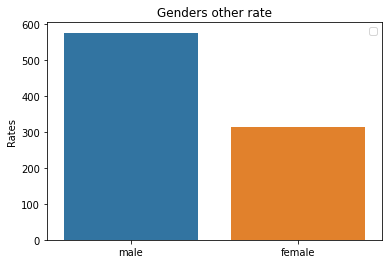

In [7]:

import seaborn as sns
sns.barplot(x=train['Sex'].value_counts().index,y=train['Sex'].value_counts().values)
plt.title('Genders other rate')
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()